### Google stocks prediction using HMM

In [9]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_df = pd.read_csv("GoogleStocks.csv")

In [11]:
train_df.head()

,date,close,volume,open,high,low
0,2019/03/26,1184.62,1894639.0,1198.53,1202.8300,1176.720
1,2019/03/25,1193.00,1493841.0,1196.93,1206.3975,1187.040
2,2019/03/22,1205.50,1668910.0,1226.32,1230.0000,1202.825
3,2019/03/21,1231.54,1195899.0,1216.00,1231.7900,1213.150
4,2019/03/20,1223.97,2089367.0,1197.35,1227.1400,1196.170


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
date      755 non-null object
close     755 non-null float64
volume    755 non-null float64
open      755 non-null float64
high      755 non-null float64
low       755 non-null float64
dtypes: float64(5), object(1)
memory usage: 35.5+ KB


In [13]:
import tensorflow as tf

In [14]:
# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.


In [15]:
stock=pd.read_csv("GoogleStocks.csv")
stock_index =stock.index.ravel()

print(list(stock.columns), "\nSHAPE ::", stock.shape)
for i in stock.columns:
    print(i, "::",stock[i].dtype)

# Declaring number for random state for reproducibility
rstate=123
    
stock.describe()


['date', 'close', 'volume', 'open', 'high', 'low'] 
SHAPE :: (755, 6)
date :: object
close :: float64
volume :: float64
open :: float64
high :: float64
low :: float64


,close,volume,open,high,low
count,755.000000,7.550000e+02,755.000000,755.000000,755.000000
mean,956.761192,1.591754e+06,956.455861,964.608985,948.292786
std,159.343122,6.850534e+05,159.292303,161.829749,156.755994
min,668.260000,5.369960e+05,671.000000,672.300000,663.284000
25%,795.897500,1.174820e+06,796.300000,801.430000,791.750000
50%,969.960000,1.401756e+06,969.460000,974.980000,960.520100
75%,1088.680000,1.814982e+06,1087.500000,1099.675000,1073.712500
max,1268.330000,5.949699e+06,1271.000000,1273.890000,1249.020000


In [16]:
X=stock[['close','open']]

In [17]:
X.head()

,close,open
0,1184.62,1198.53
1,1193.00,1196.93
2,1205.50,1226.32
3,1231.54,1216.00
4,1223.97,1197.35


In [18]:
X['close'].head()

0    1184.62
1    1193.00
2    1205.50
3    1231.54
4    1223.97
Name: close, dtype: float64

In [19]:
X['open'].head()

0    1198.53
1    1196.93
2    1226.32
3    1216.00
4    1197.35
Name: open, dtype: float64

In [20]:
X_val=X[['close','open']].values.astype(float)
X_val

array([[1184.62, 1198.53],
       [1193.  , 1196.93],
       [1205.5 , 1226.32],
       ...,
       [ 750.53,  750.1 ],
       [ 744.77,  734.59],
       [ 733.53,  736.79]])

In [21]:
X_avg=X_val.mean(axis=1)
X_avg.shape

(755,)

In [22]:
vol=stock['volume'].values
vol.shape

(755,)

In [23]:
X_features=np.column_stack((X_avg,vol))
X_features.shape

(755, 2)

(755, 2)


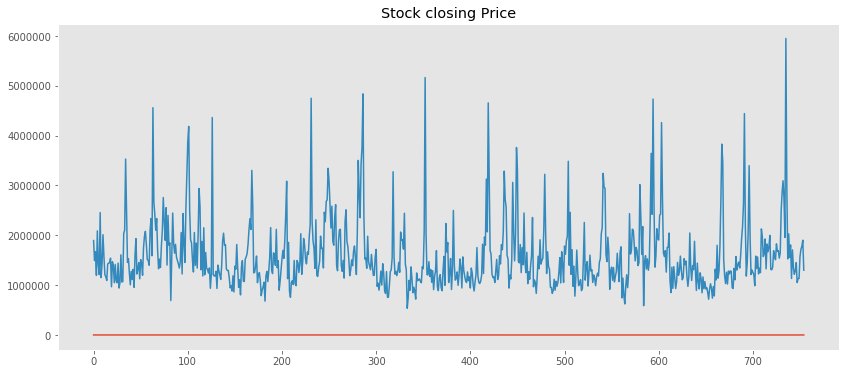

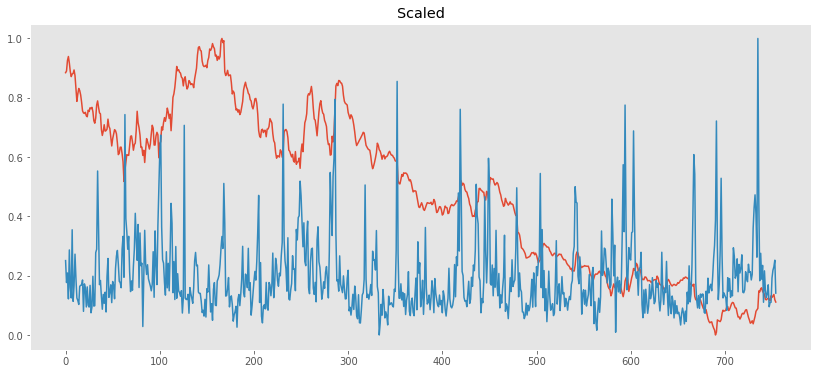

In [24]:
close_price = np.array(X_features).reshape(-1,2)
print(close_price.shape)
plt.figure(figsize=(14,6))
plt.title("Stock closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [25]:
X=[]
y=[]
for i in range(20,len(close_priceSC)):
    X.append(close_priceSC[i-20:i,0:2])
    y.append(close_priceSC[i,0])
X,y = np.array(X), np.array(y)
print(X.shape, y.shape)

(735, 20, 2) (735,)


In [26]:
X_train = X[:600,:]
X_test = X[600:,:]

y_train = y[:600]
y_test = y[600:]

In [27]:
X_train = X_train.reshape(-1,20,2)
X_test = X_test.reshape(-1,20,2)

In [28]:
print(X_train.shape)
print(X_test.shape)

(600, 20, 2)
(135, 20, 2)


In [31]:
hmm = GaussianHMM(n_components=4)
hmm.fit(X_train)

ValueError: Found array with dim 3. Estimator expected <= 2.


100%|██████████| 10/10 [00:18<00:00,  1.89s/it]

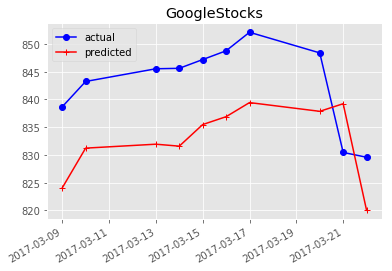

[820.0255714285714,
 839.2371428571429,
 837.8670000000001,
 839.4441428571429,
 836.9010000000001,
 835.4815714285716,
 831.5880000000001,
 831.9428571428572,
 831.2331428571429,
 824.0571428571429]

In [60]:
import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm
 
 
# Supress warning in hmmlearn
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')
 
 
class StockPredictor(object):
    def __init__(self, company, test_size=0.33,
                 n_hidden_states=4, n_latency_days=20,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10):
 
        self.company = company
        self.n_latency_days = n_latency_days
        self.hmm = GaussianHMM(n_components=n_hidden_states)
        self._split_train_test_data(test_size)
        self._compute_all_possible_outcomes( n_steps_frac_change, n_steps_frac_high, n_steps_frac_low)
 
 
    def _split_train_test_data(self, test_size):
        data = pd.read_csv('{company}.csv'.format(company=self.company))
        _train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
        self._train_data = _train_data
        self._test_data = test_data
 
    @staticmethod
    def _extract_features(data):
        open_price = np.array(data['open'])
        close_price = np.array(data['close'])
        high_price = np.array(data['high'])
        low_price = np.array(data['low'])
 
        # Compute the fraction change in close, high and low prices
        # which would be used a feature
        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price
 
        return np.column_stack((frac_change, frac_high, frac_low))
 
    def fit(self):
        feature_vector = StockPredictor._extract_features(self._train_data)
        self.hmm.fit(feature_vector)
 
    def _compute_all_possible_outcomes(self, n_steps_frac_change,n_steps_frac_high, n_steps_frac_low):
        frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
        frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
        frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)
 
        self._possible_outcomes = np.array(list(itertools.product(
            frac_change_range, frac_high_range, frac_low_range)))
 
    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, day_index - self.n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self._test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features = StockPredictor._extract_features(
            previous_data)
 
        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]
 
        return most_probable_outcome
 
    def predict_close_price(self, day_index):
        open_price = self._test_data.iloc[day_index]['open']
        predicted_frac_change, _, _ = self._get_most_probable_outcome(day_index)
        return open_price * (1 + predicted_frac_change)
 
    def predict_close_prices_for_days(self, days, with_plot=False):
        predicted_close_prices = []
        for day_index in tqdm(range(days)):
            predicted_close_prices.append(self.predict_close_price(day_index))
 
        if with_plot:
            test_data = self._test_data[0: days]
            dates=np.array(test_data['date'])
            for i in range(len(dates)):
                dates[i]=dates[i].replace('/','-')
            days = np.array(dates, dtype="datetime64[D]")
            actual_close_prices = test_data['close']
 
            fig = plt.figure()
 
            axes = fig.add_subplot(111)
            axes.plot(days, actual_close_prices, 'bo-', label="actual")
            axes.plot(days, predicted_close_prices, 'r+-', label="predicted")
            axes.set_title('{company}'.format(company=self.company))
 
            fig.autofmt_xdate()
 
            plt.legend()
            plt.show()
 
        return predicted_close_prices
 
 
stock_predictor = StockPredictor('GoogleStocks')
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]

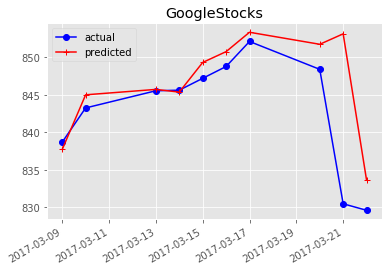

[833.6077755102041,
 853.1375510204082,
 851.7447142857143,
 853.3479795918367,
 850.7627142857143,
 849.3197755102042,
 845.3617142857142,
 845.7224489795918,
 845.0009795918368,
 837.7061224489796]

In [61]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=8, n_latency_days=20,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]

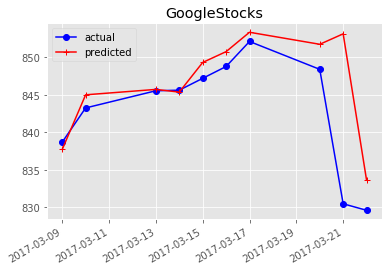

[833.6077755102041,
 853.1375510204082,
 851.7447142857143,
 853.3479795918367,
 850.7627142857143,
 849.3197755102042,
 845.3617142857142,
 845.7224489795918,
 845.0009795918368,
 837.7061224489796]

In [62]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=12, n_latency_days=20,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [07:03<00:00, 42.28s/it]

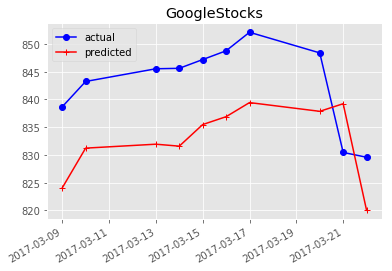

[820.0255714285714,
 839.2371428571429,
 837.8670000000001,
 839.4441428571429,
 836.9010000000001,
 835.4815714285716,
 831.5880000000001,
 831.9428571428572,
 831.2331428571429,
 824.0571428571429]

In [63]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=4, n_latency_days=50,
                 n_steps_frac_change=50, n_steps_frac_high=50,
                 n_steps_frac_low=50)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [07:16<00:00, 43.61s/it]

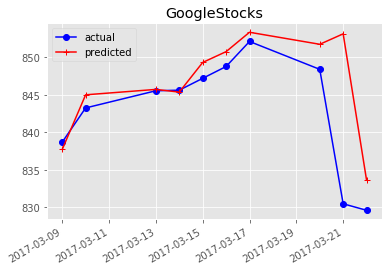

[833.6077755102041,
 853.1375510204082,
 851.7447142857143,
 853.3479795918367,
 850.7627142857143,
 849.3197755102042,
 845.3617142857142,
 845.7224489795918,
 845.0009795918368,
 837.7061224489796]

In [64]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=8, n_latency_days=50,
                 n_steps_frac_change=50, n_steps_frac_high=50,
                 n_steps_frac_low=50)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [08:01<00:00, 47.73s/it]

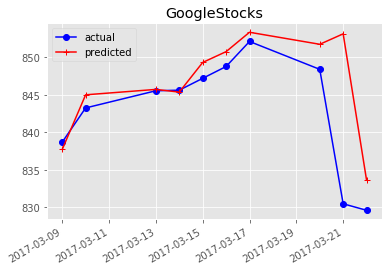

[833.6077755102041,
 853.1375510204082,
 851.7447142857143,
 853.3479795918367,
 850.7627142857143,
 849.3197755102042,
 845.3617142857142,
 845.7224489795918,
 845.0009795918368,
 837.7061224489796]

In [65]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=12, n_latency_days=50,
                 n_steps_frac_change=50, n_steps_frac_high=50,
                 n_steps_frac_low=50)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [07:43<00:00, 44.15s/it]

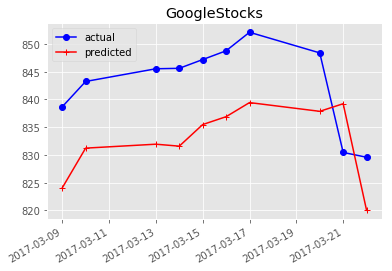

[820.0255714285714,
 839.2371428571429,
 837.8670000000001,
 839.4441428571429,
 836.9010000000001,
 835.4815714285716,
 831.5880000000001,
 831.9428571428572,
 831.2331428571429,
 824.0571428571429]

In [66]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=4, n_latency_days=70,
                 n_steps_frac_change=, n_steps_frac_high=50,
                 n_steps_frac_low=50)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


100%|██████████| 10/10 [19:46<00:00, 117.99s/it]

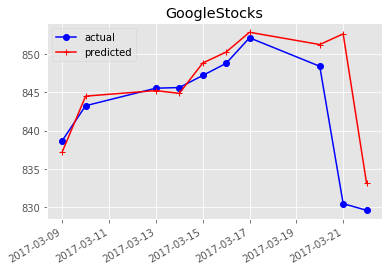

[833.1156666666666,
 852.6339130434782,
 851.2418985507246,
 852.8442173913043,
 850.2604782608695,
 848.8183913043478,
 844.8626666666665,
 845.223188405797,
 844.5021449275362,
 837.2115942028985]

In [67]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=8, n_latency_days=70,
                 n_steps_frac_change=70, n_steps_frac_high=70,
                 n_steps_frac_low=70)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)

In [ ]:
stock_predictor = StockPredictor('GoogleStocks',n_hidden_states=12, n_latency_days=70,
                 n_steps_frac_change=70, n_steps_frac_high=70,
                 n_steps_frac_low=70)
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(10, with_plot=True)


  0%|          | 0/10 [00:00<?, ?it/s]